In [1]:
! pip3 install transformers datasets
! sudo apt install tesseract-ocr
! pip3 install pytesseract

     |████████████████████████████████| 3.4 MB 35.8 MB/s 
     |████████████████████████████████| 311 kB 67.5 MB/s 
     |████████████████████████████████| 3.3 MB 63.7 MB/s 
     |████████████████████████████████| 596 kB 74.4 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 895 kB 71.3 MB/s 
     |████████████████████████████████| 243 kB 77.6 MB/s 
     |████████████████████████████████| 1.1 MB 49.4 MB/s 
     |████████████████████████████████| 133 kB 75.7 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 79.5 MB/s 
     |████████████████████████████████| 271 kB 80.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesserac

In [10]:
import numpy as np 
import pandas as pd 
import requests, zipfile, io
from sklearn.utils import shuffle
from datasets import Dataset
import os
from transformers import LayoutLMTokenizer, LayoutLMForSequenceClassification
import torch
from datasets import Features, Sequence, ClassLabel, Value, Array2D
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget "https://www.kaggleusercontent.com/kf/64394289/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kyZFB4kxsAo5AMDDijs57A.pHlRrcXtf0CJQkxaSi7KhVUykpOeiY4EdKNeTXVzkr3l9bqfgXVAE2GXQyB4gQBMxueYQ17bdRDGMVANxSOGrUrA_TGu1UPcIebgF6b-ngba3adEMdmZHjTS7Bo0kNXebtdmFsC04nruArux0YS114CEXalQn0js5dhSR-B395UAGZrf4tfBKz_B43viR_PWxWOhviSjUQQakhdYytCrK8IHLmQGKKjuLQfbd5iUCPohFwQjfN7hRQvTKcSPKuostKMadeX2eB6URBu3rqYkhOKjbqMMyEss74psxRIk4POu518M749ZxW-4WhymghW688d_Crkom19RwXzh19JgVPJeh5-5r4R5l2E6c10-Tr3XsCfz9Aysg24iW70DsN_f4UQSfn-Iy5k6CYoEQSuvplsKXhvfjeRu6Xuh4YIOB5ihGjMKlIKBUk7lerRgCdYHYtf5i06aqXkx_ioEIE8ZDObvYkFdCuuZSDIijIaeCgp-iVlOOLKylnSv-9CDfDneOFKpXFfNa9Zn0HBTBV_sywqTqMmzTKWfyW2aLmDdVuet1B9ERH7cqtmSE4MkkboJalIjM5m8omyik_v_0rT1GCVUQW0XI1xsv82P7GqZYNkPbL2qT_z3BGSy0gavhMU49LORSsw859AZhK-IV_5WqyhYohNxEMBqs2Xcdf0xSE4.8ghMjUfuk7VWyc0D_L7WaA/__results___files/__results___3_0.png"

--2022-01-24 03:59:46--  https://www.kaggleusercontent.com/kf/64394289/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kyZFB4kxsAo5AMDDijs57A.pHlRrcXtf0CJQkxaSi7KhVUykpOeiY4EdKNeTXVzkr3l9bqfgXVAE2GXQyB4gQBMxueYQ17bdRDGMVANxSOGrUrA_TGu1UPcIebgF6b-ngba3adEMdmZHjTS7Bo0kNXebtdmFsC04nruArux0YS114CEXalQn0js5dhSR-B395UAGZrf4tfBKz_B43viR_PWxWOhviSjUQQakhdYytCrK8IHLmQGKKjuLQfbd5iUCPohFwQjfN7hRQvTKcSPKuostKMadeX2eB6URBu3rqYkhOKjbqMMyEss74psxRIk4POu518M749ZxW-4WhymghW688d_Crkom19RwXzh19JgVPJeh5-5r4R5l2E6c10-Tr3XsCfz9Aysg24iW70DsN_f4UQSfn-Iy5k6CYoEQSuvplsKXhvfjeRu6Xuh4YIOB5ihGjMKlIKBUk7lerRgCdYHYtf5i06aqXkx_ioEIE8ZDObvYkFdCuuZSDIijIaeCgp-iVlOOLKylnSv-9CDfDneOFKpXFfNa9Zn0HBTBV_sywqTqMmzTKWfyW2aLmDdVuet1B9ERH7cqtmSE4MkkboJalIjM5m8omyik_v_0rT1GCVUQW0XI1xsv82P7GqZYNkPbL2qT_z3BGSy0gavhMU49LORSsw859AZhK-IV_5WqyhYohNxEMBqs2Xcdf0xSE4.8ghMjUfuk7VWyc0D_L7WaA/__results___files/__results___3_0.png
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercon

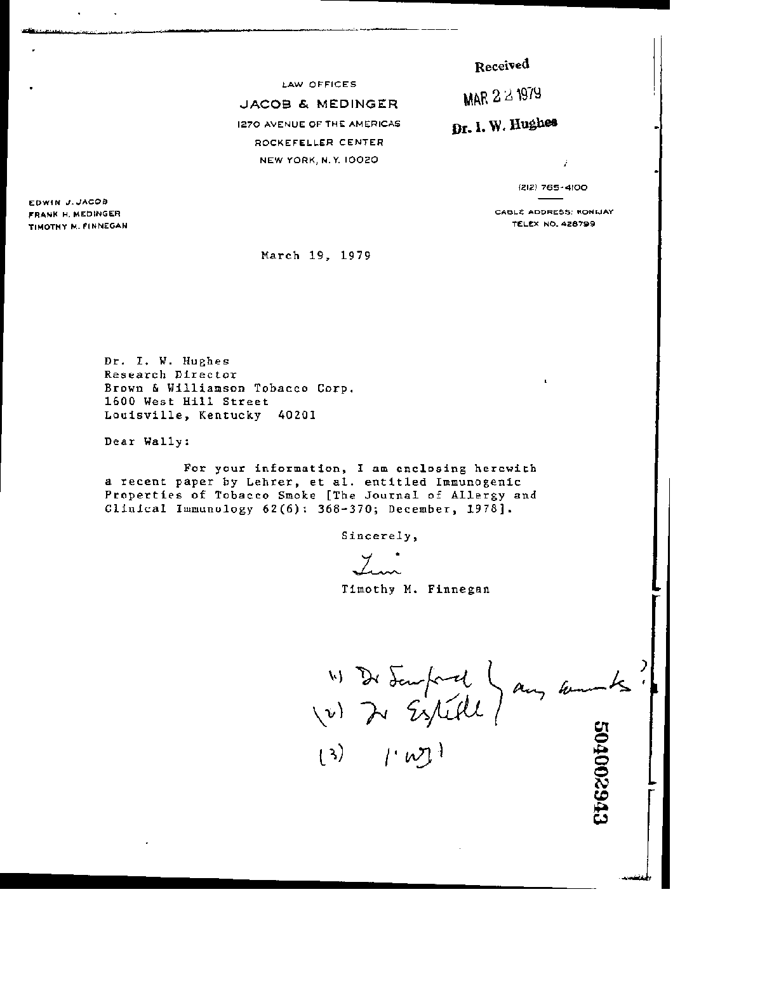

In [13]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/drive/MyDrive/Data/Sample.png")
image = image.convert("RGB")
image

In [5]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame',config="-c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz -psm 6")
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'Received Mar 22 1973 1270 AVENUE OF THE AMERICAS pr. 1. W. Hughes 4 Law OFFICES. YACOB & MEDINGER ROCKEFELLER CENTER NEW YORK, N.Y. 10020 Maren 18, 1979 Dr. T. W. Hughes Research Director . Brown & Willianson Tobacco Corp 1600 West Hill Street Lovisvilie, Kentucky 40201 Dear Wally: For your information, I am enclosing herewith a recent paper by Lehrer, et ei. entitled Immunogenic Properties of Tobacco Smoke [The Journal of Allergy and Clinical Tununvlogy 62(6): 368-370; December, 1978]. Sincerely, La Timothy M. Finnegai WO ke Ay bom WD tle Ww pw? epezoobos'

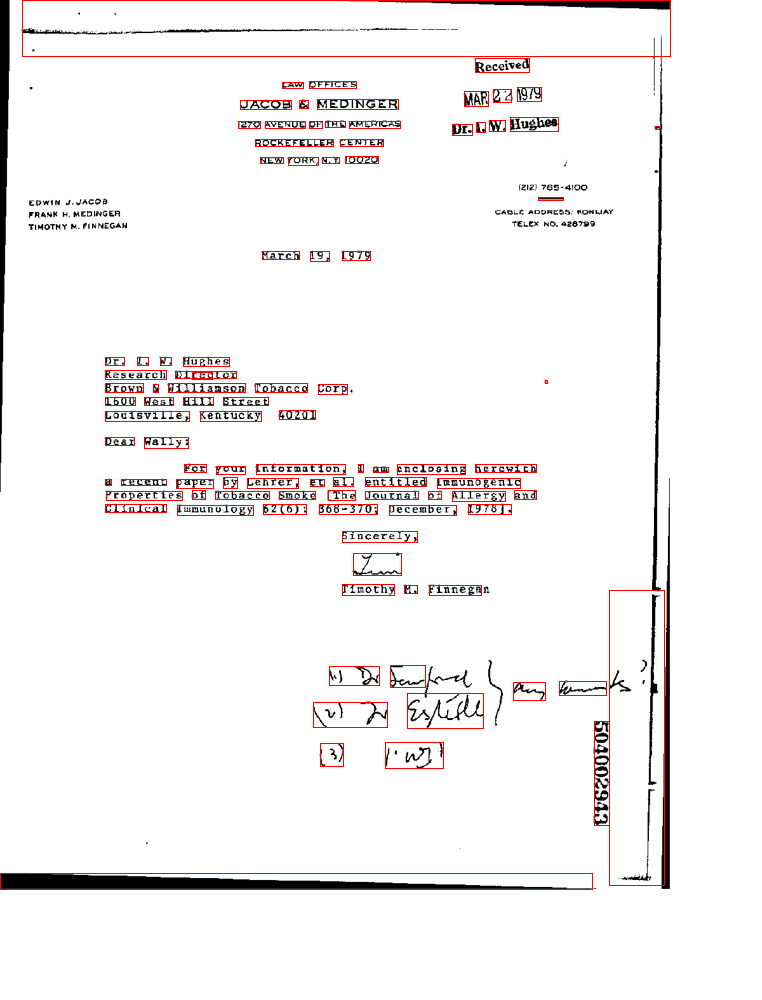

In [6]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [15]:
dataset_path = "/content/drive/MyDrive/Data/Train"
labels = [label for label in os.listdir(dataset_path)]
idx2label = {v: k for v, k in enumerate(labels)}
label2idx = {k: v for v, k in enumerate(labels)}
label2idx

{'advertisement': 2, 'budget': 1, 'email': 0}

In [17]:
data=pd.DataFrame()
i=0
for label in os.listdir(dataset_path):
    count=0
    for filename in os.listdir(dataset_path+'/'+label):

        if '.ipynb' not in filename and count<200:
            data.at[i,'image_path']=dataset_path+'/'+label+'/'+filename
            data.at[i,'label']=label
            i=i+1
            count=count+1


data = shuffle(data)

In [18]:
data.head()

,image_path,label
20,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement
28,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement
0,/content/drive/MyDrive/Data/Train/email/000147...,email
2,/content/drive/MyDrive/Data/Train/email/000145...,email
25,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement


In [19]:
len(data)

31

In [20]:
data.columns

Index(['image_path', 'label'], dtype='object')

In [21]:
X=data[['image_path']]
y=data[['label']]

In [22]:
X

,image_path
20,/content/drive/MyDrive/Data/Train/advertisemen...
28,/content/drive/MyDrive/Data/Train/advertisemen...
0,/content/drive/MyDrive/Data/Train/email/000147...
2,/content/drive/MyDrive/Data/Train/email/000145...
25,/content/drive/MyDrive/Data/Train/advertisemen...
16,/content/drive/MyDrive/Data/Train/budget/00000...
5,/content/drive/MyDrive/Data/Train/email/711300...
21,/content/drive/MyDrive/Data/Train/advertisemen...
14,/content/drive/MyDrive/Data/Train/budget/00000...
26,/content/drive/MyDrive/Data/Train/advertisemen...


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y)

X_valid,X_test,y_valid,y_test=train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [24]:
X_train

,image_path
14,/content/drive/MyDrive/Data/Train/budget/00000...
8,/content/drive/MyDrive/Data/Train/email/125038...
19,/content/drive/MyDrive/Data/Train/budget/00000...
30,/content/drive/MyDrive/Data/Train/advertisemen...
29,/content/drive/MyDrive/Data/Train/advertisemen...
0,/content/drive/MyDrive/Data/Train/email/000147...
26,/content/drive/MyDrive/Data/Train/advertisemen...
17,/content/drive/MyDrive/Data/Train/budget/00000...
5,/content/drive/MyDrive/Data/Train/email/711300...
10,/content/drive/MyDrive/Data/Train/budget/00004...


In [25]:
train_data=pd.concat([X_train, y_train], axis=1)
valid_data=pd.concat([X_valid, y_valid], axis=1)
test_data=pd.concat([X_test, y_test], axis=1)

In [26]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

18
6
7


In [27]:
train_size=len(train_data)
validation_size=len(valid_data)
test_size=len(test_data)

In [28]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = Image.open(example['image_path'])

        width, height = image.size
        
        # apply ocr to the image 
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
            actual_boxes.append(actual_box)
        
        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))
        
        # add as extra columns 
        assert len(words) == len(boxes)
        example['words'] = words
        example['bbox'] = boxes
        return example

In [29]:
train_dataset = Dataset.from_pandas(train_data)
updated_train_dataset = train_dataset.map(apply_ocr)

valid_dataset = Dataset.from_pandas(valid_data)
updated_valid_dataset = valid_dataset.map(apply_ocr)

test_dataset = Dataset.from_pandas(test_data)
updated_test_dataset = test_dataset.map(apply_ocr)

# TODO: Check This
updated_train_dataset=updated_train_dataset.remove_columns('__index_level_0__')
updated_valid_dataset=updated_valid_dataset.remove_columns('__index_level_0__')
updated_test_dataset=updated_test_dataset.remove_columns('__index_level_0__') 

  0%|          | 0/18 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ex/s]

  0%|          | 0/7 [00:00<?, ?ex/s]

In [30]:
from transformers import LayoutLMTokenizer
import torch
from datasets import Features, Sequence, ClassLabel, Value, Array2D

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

def encode_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = example['words']
  normalized_word_boxes = example['bbox']

  assert len(words) == len(normalized_word_boxes)

  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))
  
  # Truncation of token_boxes
  special_tokens_count = 2 
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]
  
  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]
  
  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length
  encoding['bbox'] = token_boxes
  encoding['label'] = label2idx[example['label']]

  assert len(encoding['input_ids']) == max_seq_length
  assert len(encoding['attention_mask']) == max_seq_length
  assert len(encoding['token_type_ids']) == max_seq_length
  assert len(encoding['bbox']) == max_seq_length

  return encoding



features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(names=['refuted', 'entailed']),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})

In [31]:
encoded_train_dataset = updated_train_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_train_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])


encoded_valid_dataset = updated_valid_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_valid_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

encoded_test_dataset = updated_test_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_test_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

  0%|          | 0/18 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ex/s]

  0%|          | 0/7 [00:00<?, ?ex/s]

In [32]:
train_dataloader = torch.utils.data.DataLoader(encoded_train_dataset, batch_size=5, shuffle=True)
validation_dataloader = torch.utils.data.DataLoader(encoded_valid_dataset, batch_size=2, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(encoded_test_dataset, batch_size=1, shuffle=True)

In [33]:
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device)

Downloading:   0%|          | 0.00/432M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint 

LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0): LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
      

In [34]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 50
t_total = len(train_dataloader) * num_train_epochs # total number of training steps 


for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  model.train()
  for batch in train_dataloader:
      input_ids = batch["input_ids"].to(device)
      bbox = batch["bbox"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      token_type_ids = batch["token_type_ids"].to(device)
      labels = batch["label"].to(device)

      # forward pass
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                      labels=labels)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == labels).float().sum()

      # backward pass to get the gradients 
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1
  
  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / train_size
  print("Training accuracy:", accuracy.item())
    
  if epoch%5==0:
    model.eval()

    correct = 0
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        bbox = batch["bbox"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
        predictions = outputs.logits.argmax(-1)
        correct += (predictions == labels).float().sum()

    accuracy = 100 * correct / validation_size
    print("Validation accuracy:", accuracy.item())

Epoch: 0
Loss: 1.518455982208252
Training accuracy: 44.4444465637207
Validation accuracy: 50.0
Epoch: 1
Loss: 1.1406551798184712
Training accuracy: 77.77777862548828
Epoch: 2
Loss: 0.8141213258107504
Training accuracy: 100.0
Epoch: 3
Loss: 0.587128758430481
Training accuracy: 100.0
Epoch: 4
Loss: 0.42835208773612976
Training accuracy: 100.0
Epoch: 5
Loss: 0.2703775266806285
Training accuracy: 100.0
Validation accuracy: 83.33333587646484
Epoch: 6
Loss: 0.17505250622828802
Training accuracy: 100.0
Epoch: 7
Loss: 0.11979389439026515
Training accuracy: 100.0
Epoch: 8
Loss: 0.0827186144888401
Training accuracy: 100.0
Epoch: 9
Loss: 0.056478372464577355
Training accuracy: 100.0
Epoch: 10
Loss: 0.04803692363202572
Training accuracy: 100.0
Validation accuracy: 83.33333587646484
Epoch: 11
Loss: 0.039490249628822006
Training accuracy: 100.0
Epoch: 12
Loss: 0.03295712483425935
Training accuracy: 100.0
Epoch: 13
Loss: 0.027386493980884552
Training accuracy: 100.0
Epoch: 14
Loss: 0.0219094237933556

In [52]:
model.eval()
labels_output=[]
predictions_output=[]


correct = 0
for batch in test_dataloader:
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)
    outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
    predictions = outputs.logits.argmax(-1)
#     print(labels)
#     print(predictions)
    correct += (predictions == labels).float().sum()
#     print(correct)

accuracy = 100 * correct / test_size
print("Testing accuracy:", accuracy.item())

Testing accuracy: 85.71428680419922


In [53]:
# Inference Bruh

In [54]:
test_data

,image_path,label
2,/content/drive/MyDrive/Data/Train/email/000145...,email
7,/content/drive/MyDrive/Data/Train/email/117141...,email
23,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement
18,/content/drive/MyDrive/Data/Train/budget/00000...,budget
21,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement
22,/content/drive/MyDrive/Data/Train/advertisemen...,advertisement
12,/content/drive/MyDrive/Data/Train/budget/00001...,budget


In [55]:
updated_test_dataset = test_dataset.map(apply_ocr)
updated_test_dataset
updated_test_dataset=updated_test_dataset.remove_columns('__index_level_0__') 
encoded_test_dataset = updated_test_dataset.map(lambda example: encode_example(example), 
                                      features=features)
encoded_test_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])
test_dataloader = torch.utils.data.DataLoader(encoded_test_dataset, batch_size=1, shuffle=True)

  0%|          | 0/7 [00:00<?, ?ex/s]

  0%|          | 0/7 [00:00<?, ?ex/s]

In [56]:
test_dataloader

In [57]:
model.eval()

correct = 0
for batch in test_dataloader:
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
    predictions = outputs.logits.argmax(-1)
    print("Label ::", labels)
    print("Predictions ::", predictions)

Label :: tensor([2], device='cuda:0')
Predictions :: tensor([2], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([2], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([0], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([1], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([1], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([1], device='cuda:0')
Label :: tensor([2], device='cuda:0')
Predictions :: tensor([2], device='cuda:0')
